# Time Series Forecasting of Stock Prices 

In [ ]:
'''we will have a look at applying a time series model to stock prices.
More specifically, a non-seasonal ARIMA model. We implement a grid search to 
select the optimal parameters for the model and forecast the next 12 months. 
This is an attempt to predict Stock prices based on Stock prices of previous days. The stock market refers to the collection of markets and exchanges where regular activities of buying, selling, and issuance of shares of publicly-held companies take place.
we will have a look at applying a time series model to stock prices.
More specifically, a non-seasonal ARIMA model. We implement a grid search to 
select the optimal parameters for the model and forecast the next 12 months.
This is a time series analysis and we will see simple eight ways to predict the Stock prices. The various models to be used are:
Average
Weighted Average
Moving Average
Moving Weighted Average
Linear Regression
Weighted Linear Regression

'''

In [ ]:
#Dataset :  WE will be using Amazon’s historical monthly stock price AMZN.csv

In [ ]:
#Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA
import warnings
warnings.filterwarnings("ignore")

#Now it’s time to import the dataset and view it. We do so using the panda’s 
#library and its read_csv function.

In [2]:
data = pd.read_csv('AMZN.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-01,358.739990,383.109985,330.880005,336.369995,336.369995,75253500
1,2014-04-01,338.089996,348.299988,288.000000,304.130005,304.130005,138278700
2,2014-05-01,304.130005,314.869995,284.380005,312.549988,312.549988,78579200
3,2014-06-01,312.589996,340.720001,303.839996,324.779999,324.779999,76580100
4,2014-07-01,325.859985,364.850006,311.859985,312.989990,312.989990,99426000


In [ ]:
'''We are only interested in the “Close” price. Also, we need to set the 
date as the index for the data frame.'''

In [3]:
df = data[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")

In [ ]:
'''Now that we have preprocessed our data, we can view the data as a line plot.'''

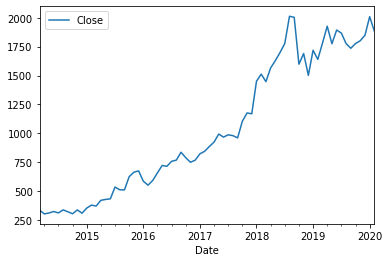

In [5]:
df.plot(style="-")
plt.show()

In [ ]:
'''we define the parameters and generate all possible combinations of the 
parameters.'''

In [6]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))

In [ ]:
'''the SARIMAX() function is applied to all combinations of parameters and 
the model with the lowest AIC is printed.'''

In [19]:
warnings.filterwarnings("ignore")
aic= []
parameters = []
for param in pdq:
  #for param in pdq:
      try:
          mod = sm.tsa.statespace.SARIMAX(df, order=param,       
enforce_stationarity=True, enforce_invertibility=True)
         
          results = mod.fit()
          # save results in lists
          aic.append(results.aic)
          parameters.append(param)
          #seasonal_param.append(param_seasonal)
          print('ARIMA{} - AIC:{}'.format(param, results.aic))
      except:
          continue
# find lowest aic          
index_min = min(range(len(aic)), key=aic.__getitem__)           
 
print('The optimal model is: ARIMA{} -AIC{}'.format(parameters[index_min], aic[index_min]))


ARIMA(0, 0, 0) - AIC:1225.905012120932
ARIMA(0, 0, 1) - AIC:1138.4009161910628
ARIMA(0, 0, 2) - AIC:1081.0699161172704
ARIMA(0, 1, 0) - AIC:853.4856999726362
ARIMA(0, 1, 1) - AIC:854.2648822137808
ARIMA(0, 1, 2) - AIC:855.520398342341
ARIMA(0, 2, 0) - AIC:899.3477630639445
ARIMA(0, 2, 1) - AIC:845.0912114317533
ARIMA(0, 2, 2) - AIC:844.4451178406484
ARIMA(1, 0, 0) - AIC:872.6299775590843
ARIMA(1, 0, 1) - AIC:873.4521899270555
ARIMA(1, 0, 2) - AIC:874.6996532894581
ARIMA(1, 1, 0) - AIC:854.0828751794445
ARIMA(1, 1, 1) - AIC:855.9837194321253
ARIMA(1, 1, 2) - AIC:857.490143431709
ARIMA(1, 2, 0) - AIC:871.6713396259582
ARIMA(1, 2, 1) - AIC:844.3543646556421
ARIMA(1, 2, 2) - AIC:846.353600681967
ARIMA(2, 0, 0) - AIC:873.2742050042496
ARIMA(2, 0, 1) - AIC:876.5897657914255
ARIMA(2, 0, 2) - AIC:876.9947510389964
ARIMA(2, 1, 0) - AIC:855.8390292159434
ARIMA(2, 1, 1) - AIC:855.4436581217542
ARIMA(2, 1, 2) - AIC:856.6568438862489
ARIMA(2, 2, 0) - AIC:862.3012978916505
ARIMA(2, 2, 1) - AIC:846.3

In [ ]:
'''The next step is to fit the ARIMA(0,2,1) model to our time series.'''

In [22]:
model = ARIMA(df, order=parameters[index_min])
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                   70
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -419.117
Method:                       css-mle   S.D. of innovations             93.233
Date:                Tue, 29 Sep 2020   AIC                            846.234
Time:                        15:18:37   BIC                            855.228
Sample:                    05-01-2014   HQIC                           849.806
                         - 02-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1941      0.452      0.429      0.669      -0.693       1.081
ar.L1.D2.Close    -0.2023      0.119     -1.700      0.094      -0.435       0.031
ma.L1.D2.Close    -1.0000      0.045

In [ ]:
'''Finally, we can forecast the next 12 months and visualise the data points
thereafter.'''

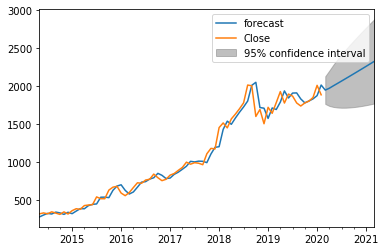

In [23]:
model_fit.plot_predict(start=2, end=len(df)+12)
plt.show()